In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
students_performance = pd.read_csv('StudentsPerformance.csv')
students_performance.rename({_: _.replace(' ', '_') for _ in students_performance.columns}, axis=1, inplace=True)

In [19]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: >

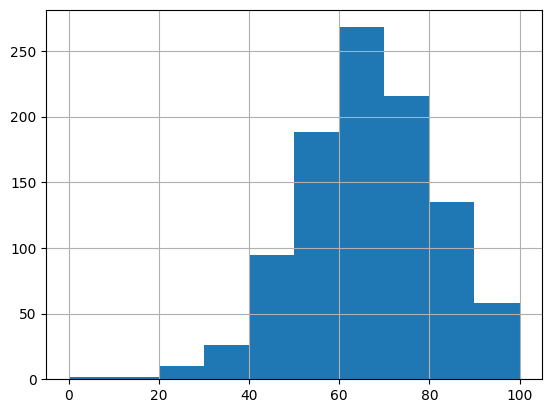

In [20]:
students_performance.math_score.hist()

<Axes: xlabel='math_score', ylabel='reading_score'>

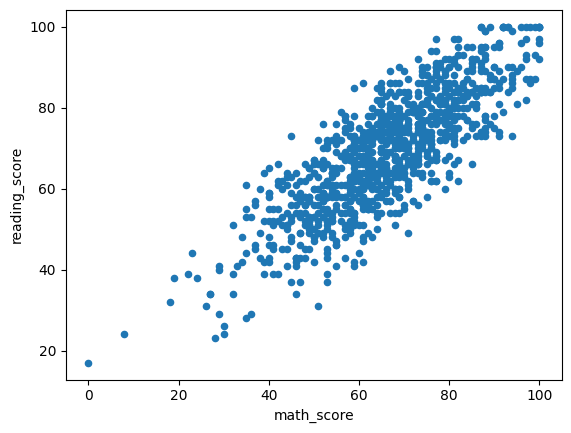

In [21]:
students_performance.plot.scatter(x='math_score', y='reading_score')

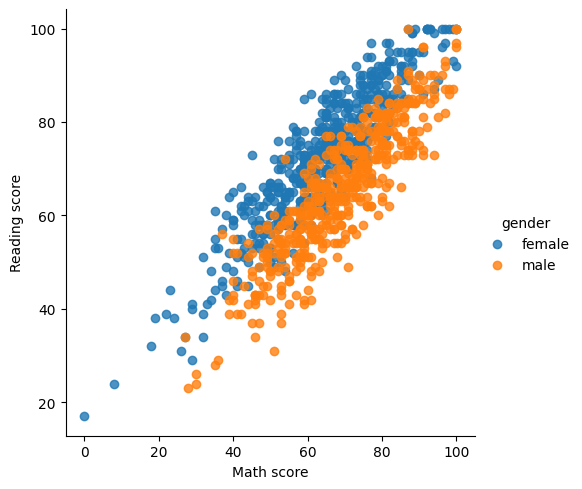

In [27]:
ax = sns.lmplot(x='math_score', 
           y='reading_score', 
           hue='gender', 
           data=students_performance, 
           fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [30]:
income_df = pd.read_csv('income.csv')
income_df.rename({_: _.replace(' ', '_') for _ in students_performance.columns}, axis=1, inplace=True)

In [31]:
income_df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<Axes: >

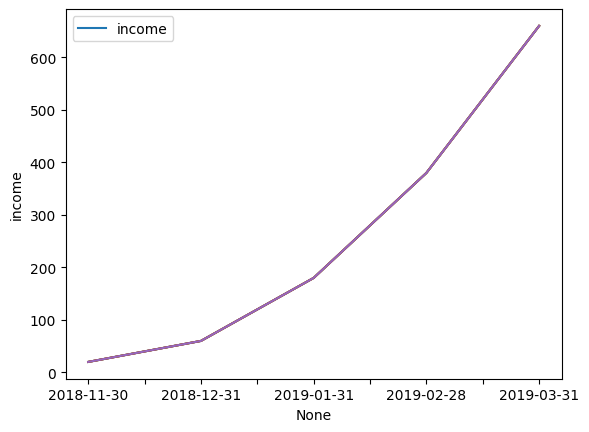

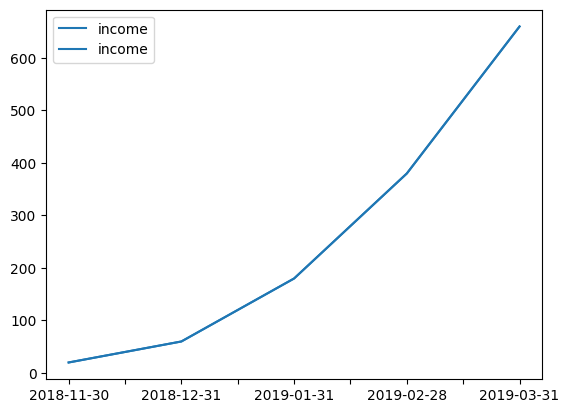

In [38]:
# all the same
income_df.plot()
sns.lineplot(x=income_df.index, y=income_df.income)
plt.plot(income_df.index, income_df.income)
income_df['income'].plot()
income_df.income.plot()
income_df.plot(kind='line')
sns.lineplot(data=income_df) 

In [46]:
df = pd.read_csv('dataset_209770_6.csv', sep=' ')
df.head()

,x,y
0,98.513699,298.433910
1,1408.778699,796.138447
2,805.827654,417.201334
3,115.389426,284.905032
4,405.589113,1207.590934


<Axes: xlabel='x', ylabel='y'>

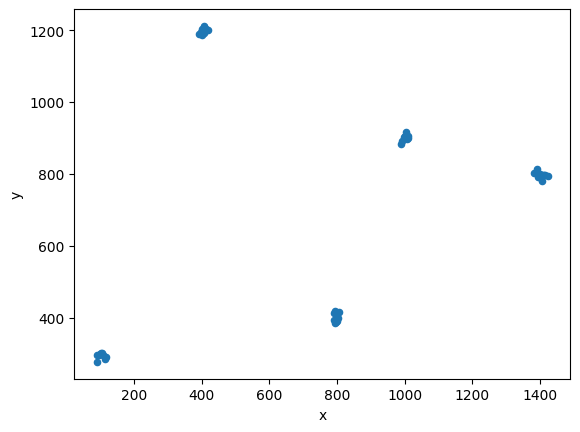

In [47]:
df.plot.scatter(x='x', y='y')

In [51]:
genome_matrix_df = pd.read_csv('genome_matrix.csv', index_col=0)
genome_matrix_df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


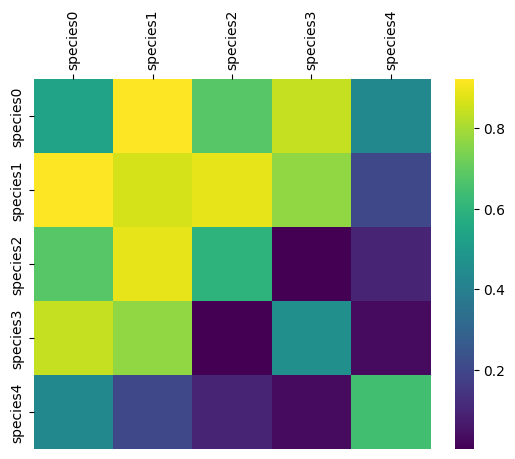

In [55]:
genome_matrix_heatmap = sns.heatmap(genome_matrix_df, cmap='viridis')
genome_matrix_heatmap.xaxis.set_ticks_position('top')
genome_matrix_heatmap.xaxis.set_tick_params(rotation=90)

In [66]:
dota_df = pd.read_csv('dota_hero_stats.csv', index_col=0)
dota_df.roles = dota_df.roles.apply(lambda _: _[1:-1].replace("\'", "").split(','))
dota_df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"[Carry, Escape, Nuker]"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"[Initiator, Durable, Disabler, Jungler]"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"[Support, Disabler, Nuker, Durable]"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"[Carry, Disabler, Jungler, Nuker, Initiator]"
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"[Support, Disabler, Nuker, Jungler]"


In [95]:
dota_df['role_count'] = dota_df.roles.apply(len)
dota_df.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles,role_count
87,Melee,89,0,Naga Siren,npc_dota_hero_naga_siren,agi,"[Carry, Support, Pusher, Disabler, Initiat...",6
114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"[Carry, Nuker, Disabler, Durable, Escape, ...",6
18,Melee,19,2,Tiny,npc_dota_hero_tiny,str,"[Carry, Nuker, Pusher, Initiator, Durable,...",6
47,Melee,49,2,Dragon Knight,npc_dota_hero_dragon_knight,str,"[Carry, Pusher, Durable, Disabler, Initiat...",6
15,Melee,16,6,Sand King,npc_dota_hero_sand_king,str,"[Initiator, Disabler, Support, Nuker, Esca...",6


In [96]:
dota_by_role_count = dota_df.groupby('role_count', as_index=False).agg({'name': 'count'})
dota_by_role_count.sort_values(by='name', inplace=True, ascending=False)
dota_by_role_count.head()

,role_count,name
3,4,38
4,5,33
2,3,28
1,2,9
5,6,8


<Axes: xlabel='name', ylabel='role_count'>

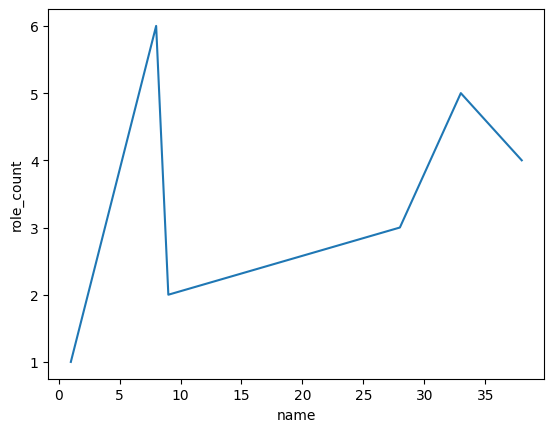

In [97]:
sns.lineplot(x=dota_by_role_count.name, y=dota_by_role_count.role_count)

In [99]:
iris_df = pd.read_csv('iris.csv', index_col=0)
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: ylabel='Density'>

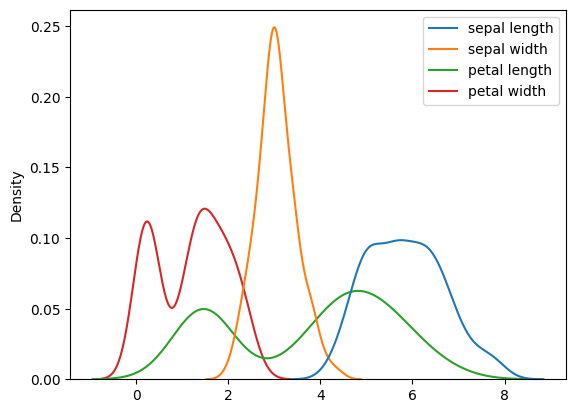

In [108]:
sns.kdeplot(data=iris_df.iloc[:, :-1])

<Axes: ylabel='petal length'>

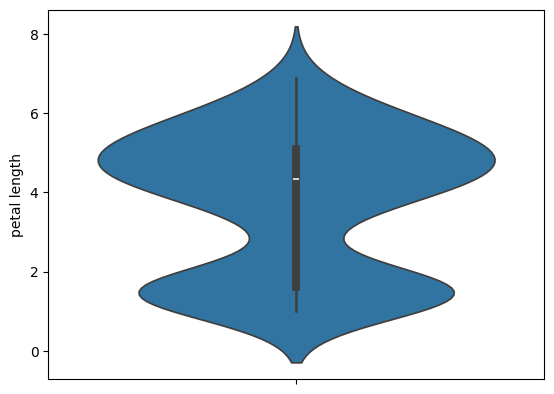

In [110]:
sns.violinplot(data=iris_df['petal length'])

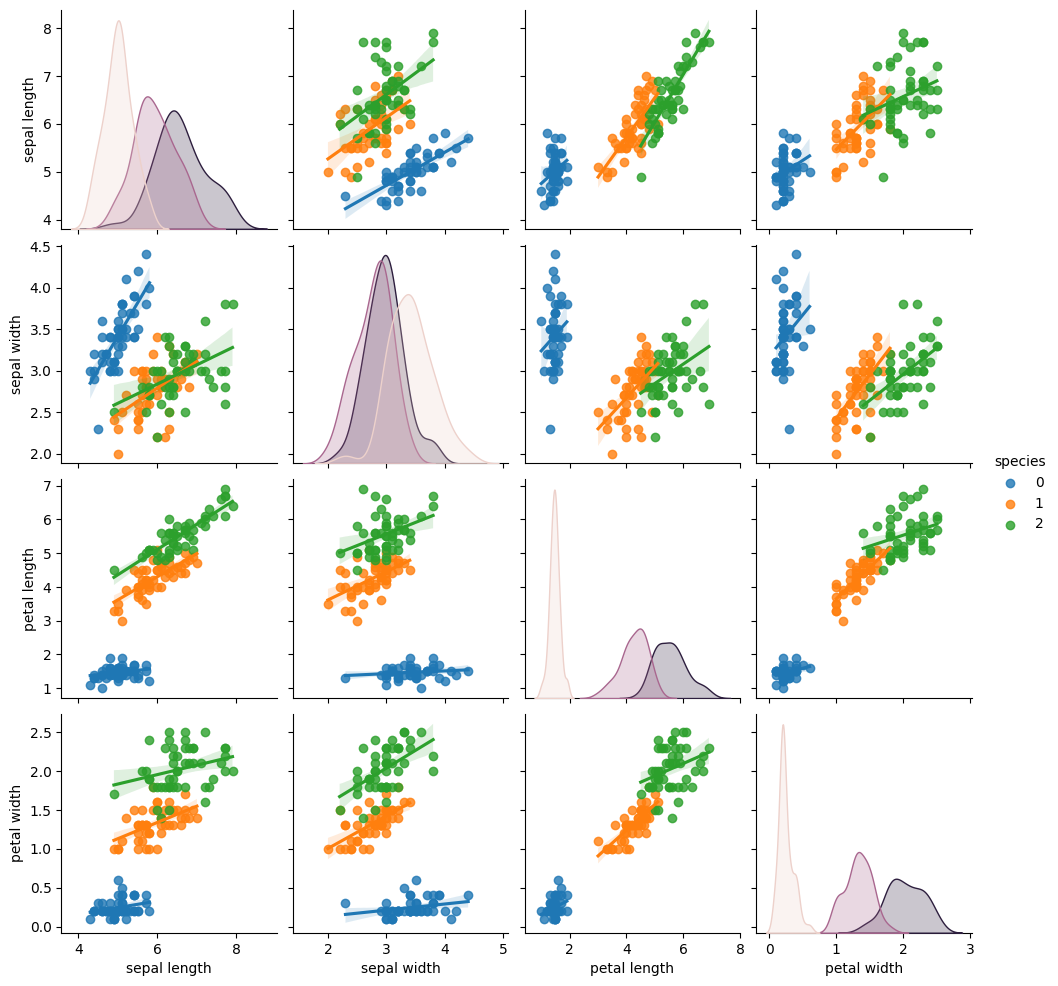

In [117]:
sns.pairplot(data=iris_df, hue='species', kind="reg")